# Regression Analysis Lecture

In this lecture, we'll perform regression analysis using Python. We'll cover:
- Simple Linear Regression on a fuel dataset
- Multiple Linear Regression with more predictors
- Visualization of regression results
- Polynomial Regression with regularization (Ridge and Lasso)
- 3D visualization and animated plots

We'll use libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`. Make sure to run each cell in sequence.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from matplotlib.animation import FuncAnimation

# Set plotting styles and inline display
%matplotlib inline
sns.set(style="whitegrid")


## Simple Linear Regression on Fuel Data

We use a noisy fuel dataset (`fuel_data.txt`) where:
- The column `duration` is in "MM:SS" format. We convert it to minutes.
- The target variable is `dist` (distance).

*Note: Ensure that 'fuel_data.txt' is uploaded to Colab.*


In [3]:
# Load and Prepare Fuel Dataset
# Example: fuel_data.txt should be a tab-delimited file

fuel = pd.read_csv('/content/sample_data/fuel_data.txt', delimiter='\t')

# Convert 'duration' from "MM:SS" to minutes
fuel['minutes'] = fuel['duration'].apply(lambda t: int(t.split(':')[0]) * 60 + int(t.split(':')[1]))

# Display the first few rows
print("Fuel Data (first 5 rows):")
display(fuel.head())


Fuel Data (first 5 rows):


,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons,minutes
0,2018.06.03,00:03,01:16,17,15,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1,73
1,2018.06.03,08:20,09:29,19,24,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2,69
2,2018.06.03,13:00,15:00,30,28,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3,100
3,2018.06.04,15:30,16:30,29,28,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1,48
4,2018.06.04,18:18,19:10,30,25,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1,49


### Simple Linear Regression (Model 1)
We'll use `minutes` as our predictor and `dist` as the target.


In [4]:
# Simple Linear Regression on Fuel Data
# Prepare feature matrix X and target y
X = fuel['minutes'].values.reshape(-1, 1)
y = fuel['dist']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predict and evaluate
y_pred = model1.predict(X_test)
rmse1 = sqrt(mean_squared_error(y_test, y_pred))
mae1 = mean_absolute_error(y_test, y_pred)

print(f"Model 1 - Simple Linear Regression:\nRMSE = {rmse1:.2f}\nMAE = {mae1:.2f}")


Model 1 - Simple Linear Regression:
RMSE = 9.80
MAE = 7.22


## Visualization of Simple Regression Results

We'll plot the training data and the regression line.


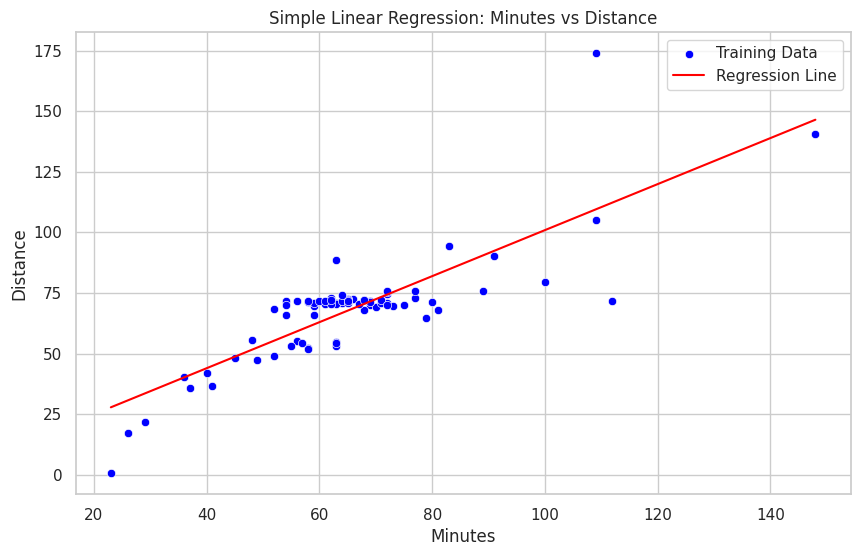

In [5]:
# Plot Simple Regression Results
interval = np.linspace(X_train.min(), X_train.max(), 100)
y_interval = model1.predict(interval.reshape(-1, 1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Training Data', color='blue')
plt.plot(interval, y_interval, color='red', label='Regression Line')
plt.xlabel('Minutes')
plt.ylabel('Distance')
plt.title('Simple Linear Regression: Minutes vs Distance')
plt.legend()
plt.show()


## Multiple Linear Regression

Now we include an additional predictor (e.g., `speed`). Assume the fuel dataset contains a column `speed`. We'll use both `minutes` and `speed` as predictors.


In [6]:
# Multiple Linear Regression on Fuel Data
# For demonstration, assume 'speed' column exists in the dataset.
# If not, you may simulate it:
if 'speed' not in fuel.columns:
    np.random.seed(101)
    fuel['speed'] = np.random.uniform(20, 80, size=len(fuel))

X_multi = fuel[['minutes', 'speed']].values
y = fuel['dist']

# Split the dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=101)

# Train the model
model2 = LinearRegression()
model2.fit(X_train_multi, y_train_multi)

# Predict and evaluate
y_pred_multi = model2.predict(X_test_multi)
rmse2 = sqrt(mean_squared_error(y_test_multi, y_pred_multi))
mae2 = mean_absolute_error(y_test_multi, y_pred_multi)

print(f"Model 2 - Multiple Linear Regression:\nRMSE = {rmse2:.2f}\nMAE = {mae2:.2f}")


Model 2 - Multiple Linear Regression:
RMSE = 3.52
MAE = 1.93


## Correlation Analysis

Visualize the correlations between features in the fuel dataset.


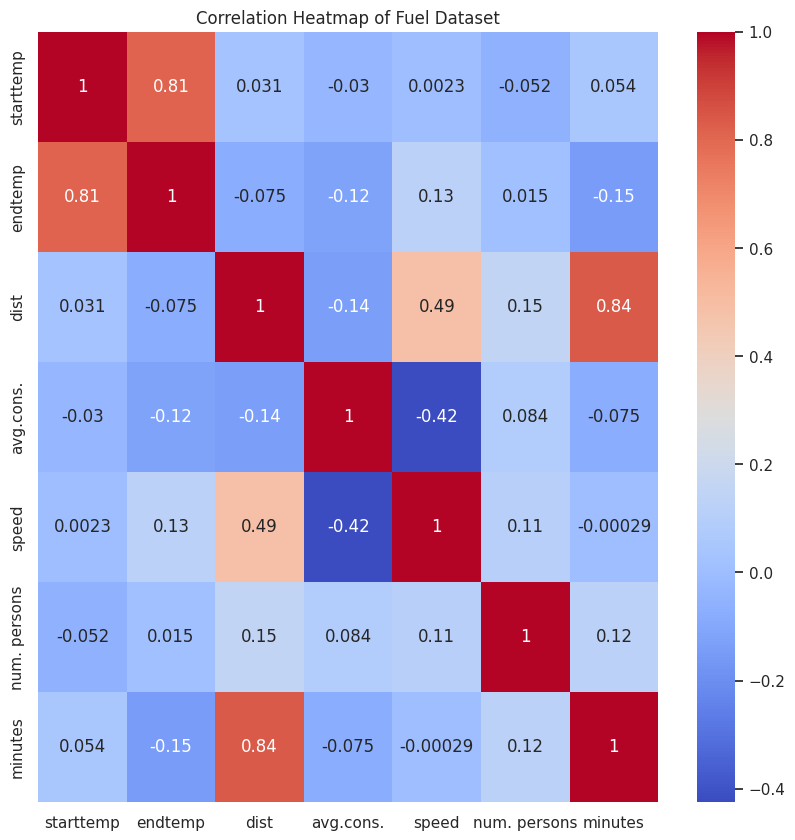

In [8]:
# Plot Correlation Heatmap
plt.figure(figsize=(10, 10))
# Select only numerical features for correlation calculation
numerical_fuel = fuel.select_dtypes(include=np.number)
sns.heatmap(numerical_fuel.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Fuel Dataset')
plt.show()


## Multiple Linear Regression on Another Dataset

Now, we'll perform multiple regression on a different dataset (`multivar.csv`). This dataset has predictors `x1` and `x2` and target `y`.


In [9]:
# Load and Inspect 'multivar.csv'
df_multivar = pd.read_csv('/content/sample_data/multivar.csv')
print("First 5 rows of multivar.csv:")
display(df_multivar.head())

print("\nStatistical Summary:")
display(df_multivar.describe())


First 5 rows of multivar.csv:


,x1,x2,y
0,-1.248691,-1.724936,-14.702219
1,3.223513,-1.154199,-13.456377
2,3.056344,-13.965425,-407.351396
3,4.145937,9.687644,-114.549694
4,0.269185,1.831660,-8.970815



Statistical Summary:


,x1,x2,y
count,250.000000,250.000000,250.000000
mean,1.847352,0.152748,-54.040771
std,1.907926,5.125066,76.316894
min,-3.056651,-13.965425,-526.702187
25%,0.611676,-3.261718,-58.192046
50%,1.844839,-0.022923,-24.408119
75%,3.199143,3.863829,-10.659100
max,6.869676,15.154286,4.017958


## Pairplot and Single Predictor Regression on multivar.csv

We'll use a pairplot to visualize relationships and perform a simple regression using predictor `x2`.


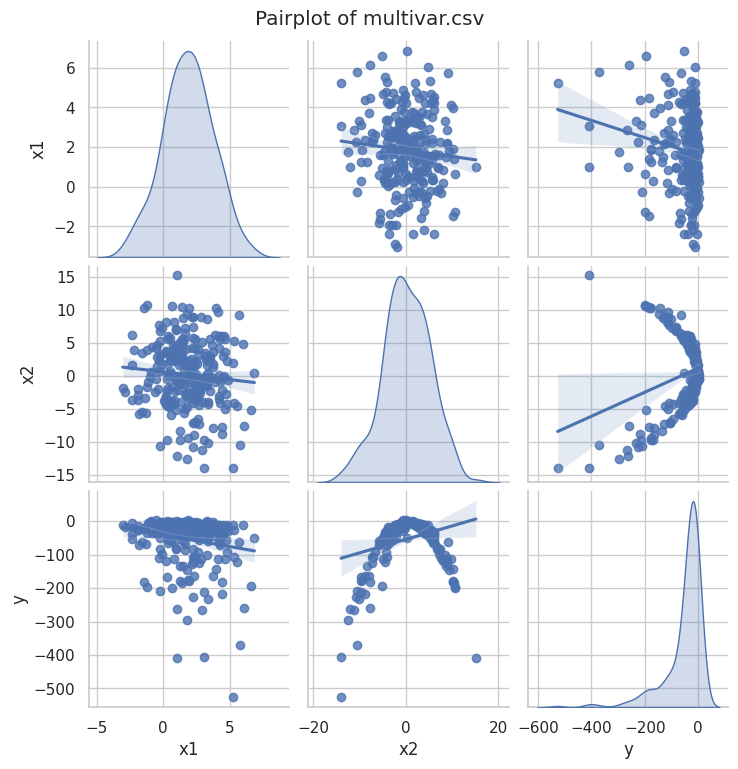

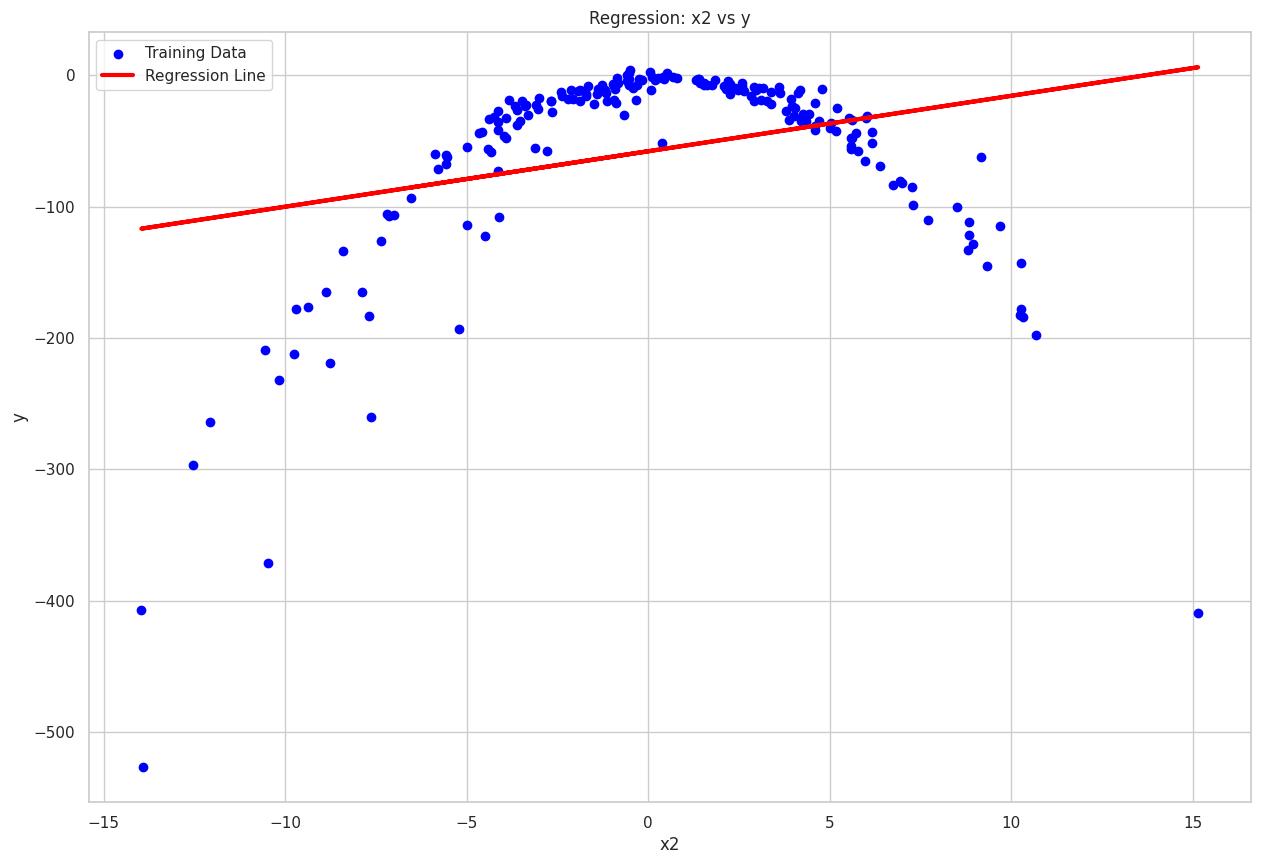

In [10]:
# Pairplot and Regression for Predictor x2
sns.pairplot(df_multivar, kind='reg', diag_kind='kde')
plt.suptitle('Pairplot of multivar.csv', y=1.02)
plt.show()

# Regression using x2 as predictor
X_x2 = df_multivar['x2'].values.reshape(-1, 1)
y = df_multivar['y']

X_train_x2, X_test_x2, y_train_x2, y_test_x2 = train_test_split(X_x2, y, test_size=0.2, random_state=101)

model_x2 = LinearRegression()
model_x2.fit(X_train_x2, y_train_x2)

y_pred_x2 = model_x2.predict(X_train_x2)

plt.figure(figsize=(15,10))
plt.scatter(X_train_x2, y_train_x2, color='blue', label='Training Data')
plt.plot(X_train_x2, y_pred_x2, color='red', linewidth=3, label='Regression Line')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Regression: x2 vs y')
plt.legend()
plt.show()


## 3D Visualization of Two-Predictor Regression

We'll visualize a multiple regression model using `x1` and `x2` as predictors in a 3D scatter plot with a regression surface.


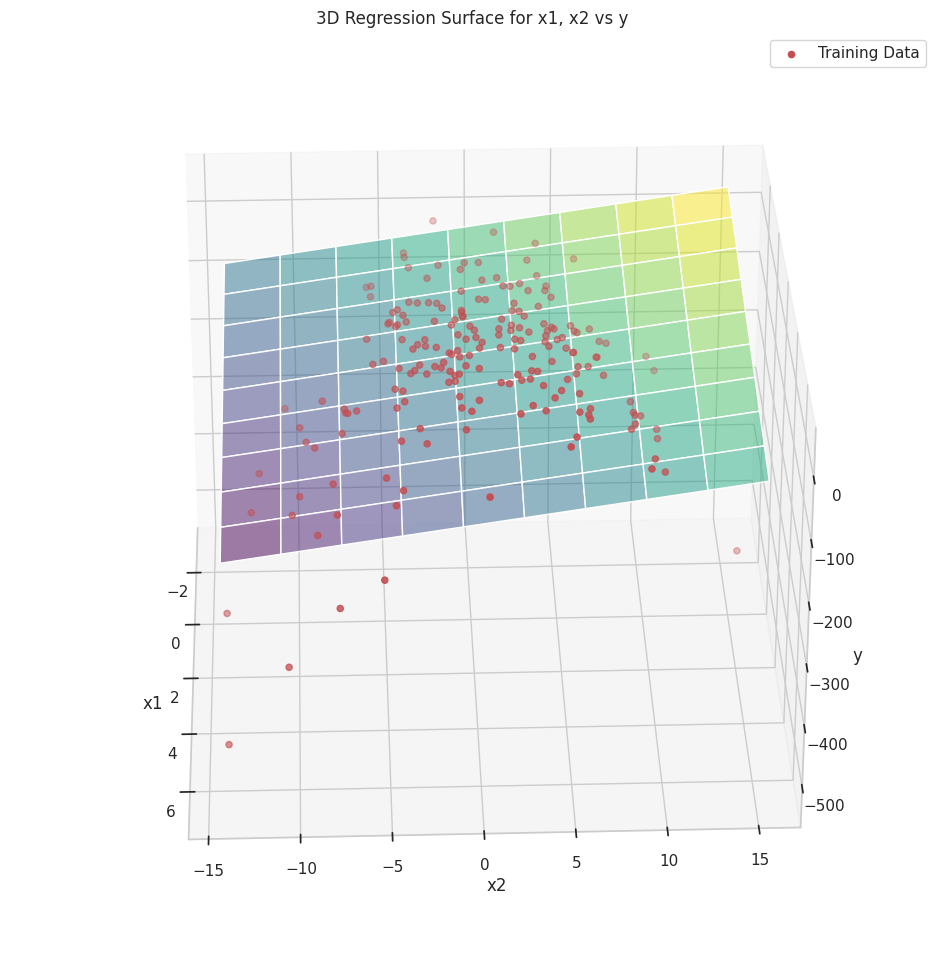

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 3D Scatter Plot and Surface for Two Predictors
columns = ['x1', 'x2']
X_multi2 = df_multivar[columns].values
y = df_multivar['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_multi2, y, test_size=0.2, random_state=101)

model_3d = LinearRegression()
model_3d.fit(X_train2, y_train2)

# Create a 3D plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training data
ax.scatter(X_train2[:, 0], X_train2[:, 1], y_train2, c='r', marker='o', label='Training Data')

# Create grid to plot regression plane
x1_range = np.linspace(df_multivar['x1'].min(), df_multivar['x1'].max(), 10)
x2_range = np.linspace(df_multivar['x2'].min(), df_multivar['x2'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid = model_3d.predict(x_grid).reshape(x1_grid.shape)

# Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Regression Surface for x1, x2 vs y')
plt.legend()

# Create an animation (requires imagemagick)
def update(i):
    ax.azim = i
    return ax

anim = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50)
anim.save('3d_regression.gif', dpi=80, writer='imagemagick')
plt.show()


## Polynomial Regression with Regularization

We'll now perform Polynomial Regression (degree 6) on the multivar dataset using `x1` and `x2` as predictors. We'll fit models using ordinary Linear Regression, Ridge, and Lasso regularization.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.03742e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ordinary Polynomial Regression intercept: -1.1844907720761455
Coefficients: [ 3.88538940e-11 -3.57237517e-01 -2.51164444e-01 -6.77340510e-01
  2.84787200e-01 -1.76168293e+00  2.08123269e-01  4.30346761e-01
  7.45338347e-02  8.96638483e-03  3.57893967e-02 -3.80665118e-02
  8.75424669e-05 -6.03825065e-03 -1.26446401e-03 -3.37170661e-02
  3.69304539e-03 -8.66730185e-03  4.06263195e-04 -4.20195308e-04
 -5.67480739e-05  3.28443457e-03  1.64822016e-04  1.17806308e-03
  2.10263211e-05  9.14209516e-05  2.55763984e-05  5.96008066e-06]

Ridge Regression intercept: -1.1844932841388243
Coefficients: [ 0.00000000e+00 -3.57236043e-01 -2.51164340e-01 -6.77339049e-01
  2.84787137e-01 -1.76168284e+00  2.08122641e-01  4.30346758e-01
  7.45337762e-02  8.96638327e-03  3.57893094e-02 -3.80664985e-02
  8.75248263e-05 -6.03825179e-03 -1.26446454e-03 -3.37170139e-02
  3.69304282e-03 -8.66728985e-03  4.06263685e-04 -4.20194884e-04
 -5.67480617e-05  3.28443003e-03  1.64822108e-04  1.17806171e-03
  2.10262664e-0

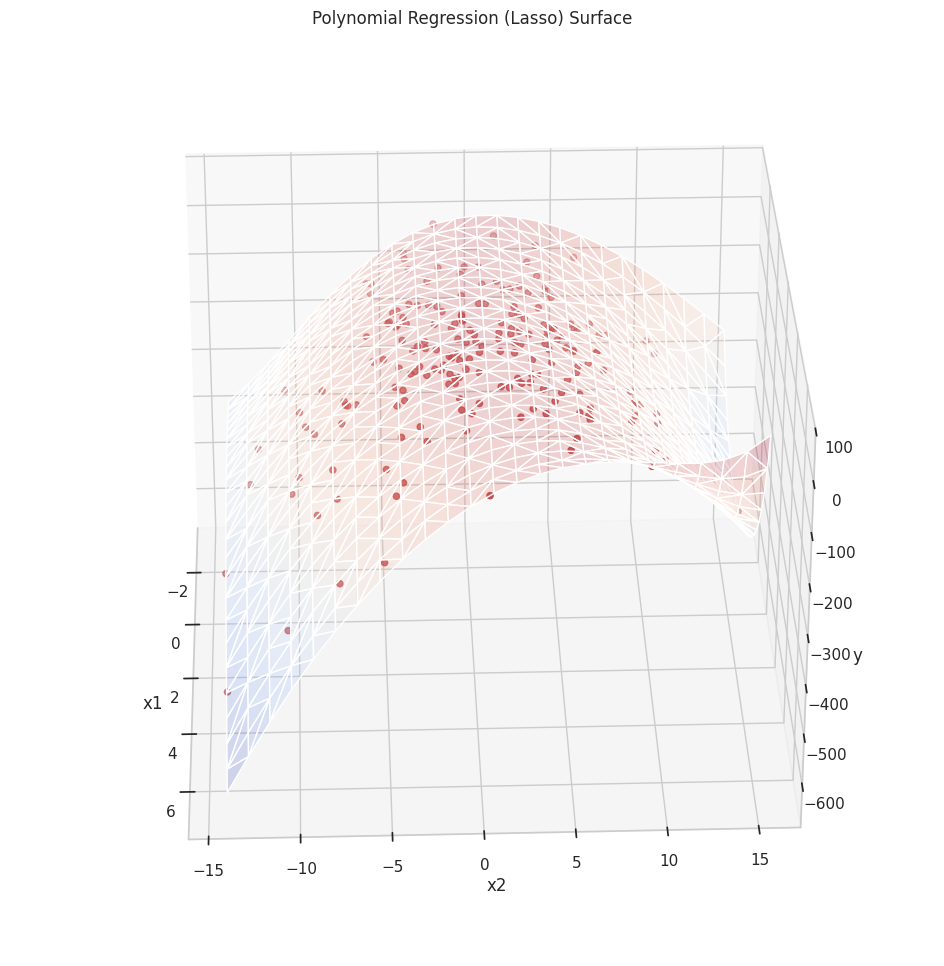

In [13]:
# Polynomial Regression and Regularization
from sklearn.preprocessing import PolynomialFeatures

# Prepare data
X_poly = df_multivar[columns].values
y = df_multivar['y']

# Create polynomial features
poly = PolynomialFeatures(degree=6)
X_poly_transformed = poly.fit_transform(X_poly)

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_transformed, y, test_size=0.2, random_state=101)

# Ordinary Polynomial Regression
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
print("Ordinary Polynomial Regression intercept:", model_poly.intercept_)
print("Coefficients:", model_poly.coef_)

# Ridge Regression
model_ridge = Ridge(alpha=0.0001)
model_ridge.fit(X_train_poly, y_train_poly)
print("\nRidge Regression intercept:", model_ridge.intercept_)
print("Coefficients:", model_ridge.coef_)

# Lasso Regression
model_lasso = Lasso(alpha=0.0001, max_iter=10000)
model_lasso.fit(X_train_poly, y_train_poly)
print("\nLasso Regression intercept:", model_lasso.intercept_)
print("Coefficients:", model_lasso.coef_)

# Generate predictions over a grid for visualization
xs, ys = [], []
for x1_val in np.linspace(df_multivar['x1'].min(), df_multivar['x1'].max(), 25):
    for x2_val in np.linspace(df_multivar['x2'].min(), df_multivar['x2'].max(), 25):
        xs.append(x1_val)
        ys.append(x2_val)

X_surf = np.c_[xs, ys]
X_surf_poly = poly.transform(X_surf)
zs = model_lasso.predict(X_surf_poly)

# 3D plot of Lasso Polynomial Regression
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

# Scatter training data
ax.scatter(X_train2[:, 0], X_train2[:, 1], y_train2, c='r', marker='o', label='Training Data')

# Plot regression surface
ax.plot_trisurf(xs, ys, zs, alpha=0.2, cmap='coolwarm')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Polynomial Regression (Lasso) Surface')

def update_poly(i):
    ax.azim = i
    return ax

anim_poly = FuncAnimation(fig, update_poly, frames=range(0, 360, 2), interval=50)
anim_poly.save('3d_poly_regression.gif', dpi=80, writer='imagemagick')
plt.show()


## Summary

In this lecture, we covered:
- **Simple Linear Regression** on a fuel dataset (predicting distance from duration converted to minutes)
- **Multiple Linear Regression** using additional predictors (minutes, speed) with evaluation metrics (RMSE, MAE)
- **Correlation Analysis** via a heatmap
- **Multiple Regression on a Multivariate Dataset** with pairplots and 3D visualization
- **Polynomial Regression** with regularization using Ridge and Lasso
- **3D Visualization and Animations** to better understand model surfaces

For further reading, refer to:
- [scikit-learn documentation on Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
- [Matplotlib documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn documentation](https://seaborn.pydata.org/)

Happy coding!
